# Initial Notes
- Branch of mathematics that deals in vector spaces

## Vectors
- abstractly: objects that can be added together to form new vectors and that can be multiplied by scalars(i.e. numbers), also to form new vectors
- concretely: points in some finite-dimensional space
- for example:
    - if you have heights, weights, and ages of a large number of people
        - can be treated as three-dimensional vectors
    - if you have a class with four exams [exam1, exam2, exam3, exam4]
        - can be treated as a four-dimensional vector
- simplest from-scratch approach is to represent vectors as a lists of numbers    

In [1]:
from typing import List

In [2]:
Vector = List[float]

height_weight_age = [70,    # inches
                     170,   # pounds
                     40]    # years
grades = [95,   # exam1 
          80,   # exam2
          75,   # exam3
          62]   # exam4

- we will want to perform arithmetic on vectors
- lists aren't vectors, so we'll need to build those tools ourselves

**First, we'll frequently need to add two vectors**
- vectors add componentwise
    - v[0] + w[0], v[1] + v[1], etc
- we can add them if they are the same length

*EXAMPLE*
- adding [1,2] and [2, 1]
- becomes [3, 3]


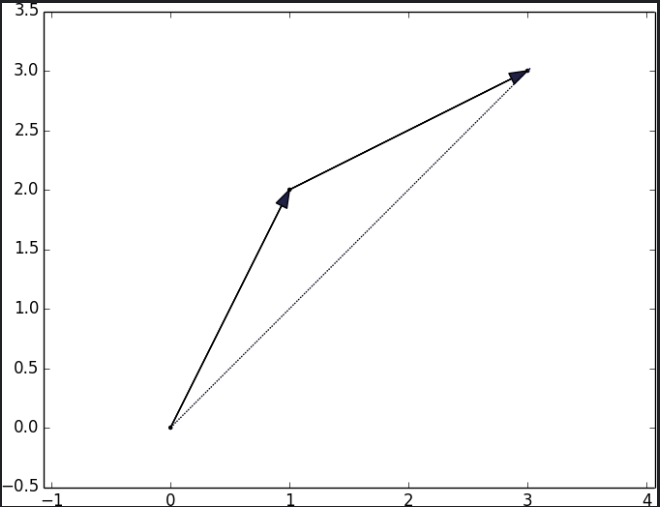

- we can easily implement this by zip-ing the vectors together and using a list comprehension to add the corresponding elements:

In [3]:
def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"
    
    return [v_i + w_i for v_i, w_i in zip(v, w)]

assert add([1, 2, 3], [4, 5, 6]) == [5, 7, 9]

- similarly, we can subtract the corresponding elements

In [4]:
def subtract(v: Vector, w:Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"
    
    return [v_i - w_i for v_i, w_i in zip(v, w)]

assert subtract([5, 7, 9], [4, 5, 6]) == [1, 2, 3]

- we'll also need some componentwise sum list of vectors
    - that is, create a new vector whose first element is the sum of all the first elements, whose second element is the sum of all the second elements, and so on...

In [5]:
def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"
    
    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"
    
    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
           for i in range(num_elements)]
assert vector_sum([[1,2], [3,4], [5,6], [7,8]])  == [16,20]
    

We'll also need to be able to multiply a vector by a scalar

In [7]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6]

This allows us to compute the componentwise means of a list of(same-sized) vectors:

In [8]:
def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

assert vector_mean([[1, 2], [3, 4], [5, 6]]) == [3, 4]

A less obvious tool is the dot product
    - sum of their componentwise products

In [9]:
def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"
        
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1, 2, 3], [4, 5, 6]) == 32

If w has a magnitude of 1, the dot product measures how far the vector v extends in the w direction.
- For example:
    - if w = [1, 0] then dot(v, w) is just the first component of v
    - in other words, it's the length of the vector you'd get if you projected v onto w

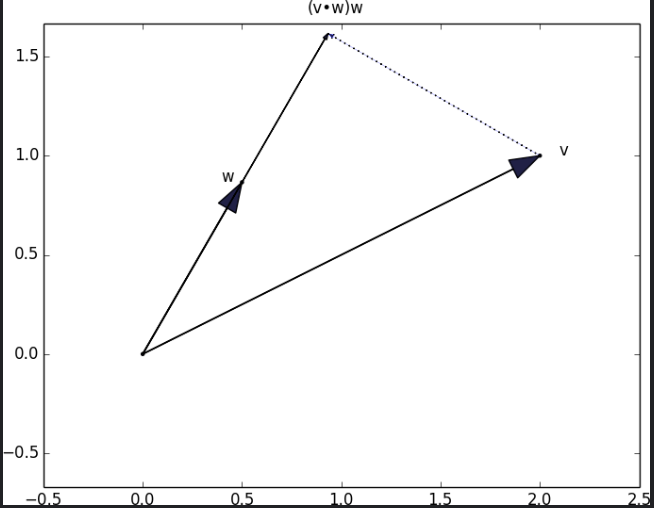

Using this, it's easy to compute a vector's sum of squares:

In [10]:
def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

assert sum_of_squares([1, 2, 3]) == 14

Which we can use to compute its magnitude (or length):

In [11]:
import math

def magnitude(v: Vector) -> float:
    """Returns the magnitude (or length) of v"""
    return math.sqrt(sum_of_squares(v))   # math.sqrt is square root function 

assert magnitude([3, 4]) == 5

Now we have all the pieces we need to compute the distance between two vectors, defined as:

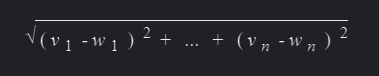

In [13]:
def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 +  (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v,w))

def distance(v: Vector, w: Vector) -> float:
    """Computes the distance between v and w"""
    return math.sqrt(squared_distance(v, w))

To simplify, we can combine into one

In [14]:
def distance(v: Vector, w: Vector) -> float:
    return magnitude(subtract(v, w))

**Note:**
- we will be using these functions heavily throughout the book
- using lists as vectors is great for exposition, but terrible for performance
- in production code, you would want to use NumPy, which includes a high-performance array class with all sorts of arithmetic operations included

## Matrices
- two-dimensional collection of numbers
- we represent matrices as lists of lists
    - each inner list having the same size and representing a row of the matrix
- if A is a matrix, then A[i][j] is the element in the ith row and the jth column
- per mathematic convention, we will use capital letters to represent matrices

In [15]:
# For example
Matrix = List[List[float]]

A = [[1, 2, 3],
     [4, 5, 6]]

B = [[1, 2],
     [3, 4],
     [5, 6]]

**Note:**
- in mathematics, you would normally name the first row of the matrix "row 1" and the first column "column 1"
    - Python lists are 0 indexed, so the first are "row 0" and "column 0"

In [16]:
from typing import Tuple

def shape(A: Matrix) -> Tuple[int, int]:
    """Returns (# of rows of A, # of columns of A)"""
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0       # number of elements in first row
    
    return num_rows, num_cols

assert shape([[1, 2, 3], [4, 5, 6]]) == (2, 3)  # 2 rows, 3 columns

If a matrix has n rows and k columns, we will refer to it as an n X k matrix.
- row vector length: k
- column vector length: n

In [17]:
def get_row(A: Matrix, i: int) -> Vector:
    """Returns the i-th row of A (as a Vector)"""
    return A[i]        # A[i] is already the ith row

def get_column(A: Matrix, j: int) -> Vector:
    """Returns the j-th column of A (as a Vector)"""
    return [A_i[j]           # jth element of row A_i
            for A_i in A]    # for each row A_i

We'll also want to create a matrix given its shape and a function for generating its elements.

We can do this using a nested list comprehension:

In [18]:
from typing import Callable

In [20]:
def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    """
    Returns a num_rows x num_cols matrix
    whose (i, j)-th entry is entry_fn(i, j)
    """
    return [[entry_fn(i, j)                   # given i, create a list
            for j in range(num_cols)]         # [entry_fn(i, 0), ...]
           for i in range(num_rows)]           # create one list for each i

Given this function, you could make a 5 x 5 identify matrix (with 1s on the diagnol and 0s elsewhere):

In [22]:
def identity_matrix(n: int) -> Matrix:
    """Returns the n x n identity matrix"""
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

assert identity_matrix(5) == [[1, 0, 0, 0, 0],
                              [0, 1, 0, 0, 0],
                              [0, 0, 1, 0, 0],
                              [0, 0, 0, 1, 0],
                              [0, 0, 0, 0, 1]]

We can use matrices to represent binary relationships.
- For example:
    - we can create a matrix A such that A[i][j] is 1 if nodes i and j are connected, and 0 otherwise

Recall that before we had:

In [23]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

We could also represent this as:

In [24]:
#            user 0  1  2  3  4  5  6  7  8  9
#
friend_matrix = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],  # user 0
                 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],  # user 1
                 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],  # user 2
                 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],  # user 3
                 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],  # user 4
                 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],  # user 5
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],  # user 6
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],  # user 7
                 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],  # user 8
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]  # user 9

If there are very few connections, this is a much more inefficient representation, since you have to store a lot of zeros.
- However, with matrix representation it is much quicker to check whether two nodes are connected, you just have to do a matrix lookup instead of (potentially) inspecting every edge

In [26]:
assert friend_matrix[0][2] == 1, "0 and 2 are friends"
assert friend_matrix[0][8] == 0, "0 and 8 are not friends"

Similarly, to find a node's connections, you only need to inspect the column (or the row) corresponding to that node:

In [28]:
friends_of_five = [i
                  for i, is_friend in enumerate(friend_matrix[5])
                  if is_friend]
friends_of_five

[4, 6, 7]

With a small graph, you could just add a list of connections to each node object to  speed up this process; but for large, evolving graph that would probably be too expensive and difficult to maintain.